In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt


(-1.0021585642328148,
 2.0354436354739707,
 -0.9716856856848604,
 2.042207350043186)

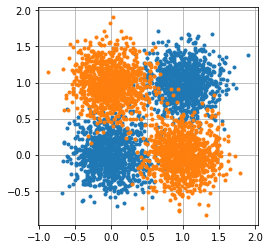

In [55]:
s = 0.25
# Build data around (0, 0)
x00 = rd.randn(2, 1000) * s # Matrix of 2 by 1000
# Build data around (1, 0)
x10 = rd.randn(2, 1000) * s
x10[0,:] = x10[0,:] + 1
# Build data around (0, 1)
x01 = rd.randn(2, 1000) * s
x01[1,:] = x10[1,:] + 1
# Build data around (1, 1)
x11 = rd.randn(2, 1000) * s + 1

# Join data that classifies as 0
x0 = np.hstack((x00, x11))
# Join data that classifies as 1
x1 = np.hstack((x01, x10))

plt.plot(x0[0,:], x0[1,:], '.')
plt.plot(x1[0,:], x1[1,:], '.')
plt.grid(True)
plt.axis('scaled')

In [56]:
X = np.hstack((x0, x1))
print(X.shape)
y = np.hstack((np.zeros(2000), np.ones(2000))) * 2 - 1
print(y.shape)

(2, 4000)
(4000,)


(-0.9966218009916675,
 1.9191716074098761,
 -0.9716856856848604,
 2.042207350043186)

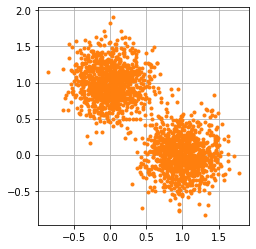

In [57]:
plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.grid(True)
plt.axis('scaled')


In [58]:
# Initialization
H = 5
Wi = rd.randn(2, H) * 0.1
b = np.zeros((H, 1))
Wo = rd.randn(H, 1) * 0.1
bo = 0

# Momentum
dzWi = np.zeros(Wi.shape)
dzb = np.zeros(b.shape)
dzWo = np.zeros(Wo.shape)
dzbo = 0

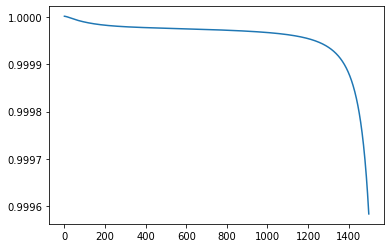

In [59]:
iter = 1500
eta = 1e-5
alpha = 0.9

Error = np.zeros(iter)

for n in range(iter):
    #forward pass
    u = np.dot(Wi.T, X) + b
    v = np.tanh(u)
    z = np.dot(Wo.T, v) + bo
    yh = np.tanh(z)
    #error
    E = y - yh
    Error[n] = np.mean(E**2)
    #gradient
    dz = -2 * E * (1 - yh**2)
    dbo = np.sum(dz)
    dWo = np.dot(v, dz.T)
    du = (1 - v**2) * np.dot(Wo, dz)
    db = np.sum(du, axis=1)
    dWi = np.dot(X, du.T)
    #adapt (back propagation)
    dzWi = alpha*dzWi + dWi
    dzb = alpha*dzb + db[:, np.newaxis]
    dzWo = alpha*dzWo + dWo
    dzbo = alpha*dzbo + dbo

    Wi = Wi - eta * dzWi
    b = b - eta * dzb
    Wo = Wo - eta * dzWo
    bo = bo - eta * dzbo
plt.plot(Error)

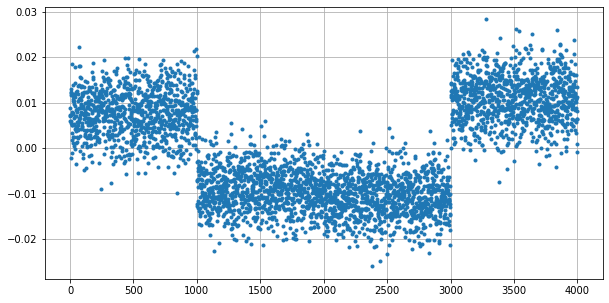

In [60]:
plt.figure(figsize=(10,5))
plt.plot(yh.squeeze(), '.')
plt.grid(True)

In [ ]:
plt.figure(figsize=(6,6))
ye = (yh.squeeze() >= 0) * 2 - 1
plt.plot(X[0, y==-1], X[1, y==-1], '.b')
plt.plot(X[0, y==1], X[1, y==1], '.r')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.7)

